# EDA: Breast Cancer Dataset

Começaremos fazer as análises após fazer a importação dos dados e das bibliotecas.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
#Atributos
X = pd.DataFrame(data=data.data, columns=data.feature_names)
#Variável dependente
y = pd.DataFrame(data=data.target, columns=['diagnostic'])

In [4]:
df = pd.concat([X,y], axis=1)

In [5]:
# Definir o que é 0 e o que é 1.
df['diagnostic'].value_counts()

1    357
0    212
Name: diagnostic, dtype: int64

Nesse caso, 1 são os casos benignos e 0 são os casos malignos.

Daqui nossa ideia é fazer uma análise comparativa de cada variável separadamente e depois em conjuntos, sempre pensando em relação a variável dependente. No final fazer um mapa de correlação entre os atributos.

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Pelo describe não pode ser tirado tantas conclusões pois os atributos estão muito relacionados com a área médica que não é meu foco desse estudo. Mas podemos tirar mais conclusões vendo as principais relações com variável alvo.

In [7]:
#Quantidade de variáveis nulas.
df.isnull().sum().sum()

0

A Célula acima mostra a quantidade de valores nulos no dataset.

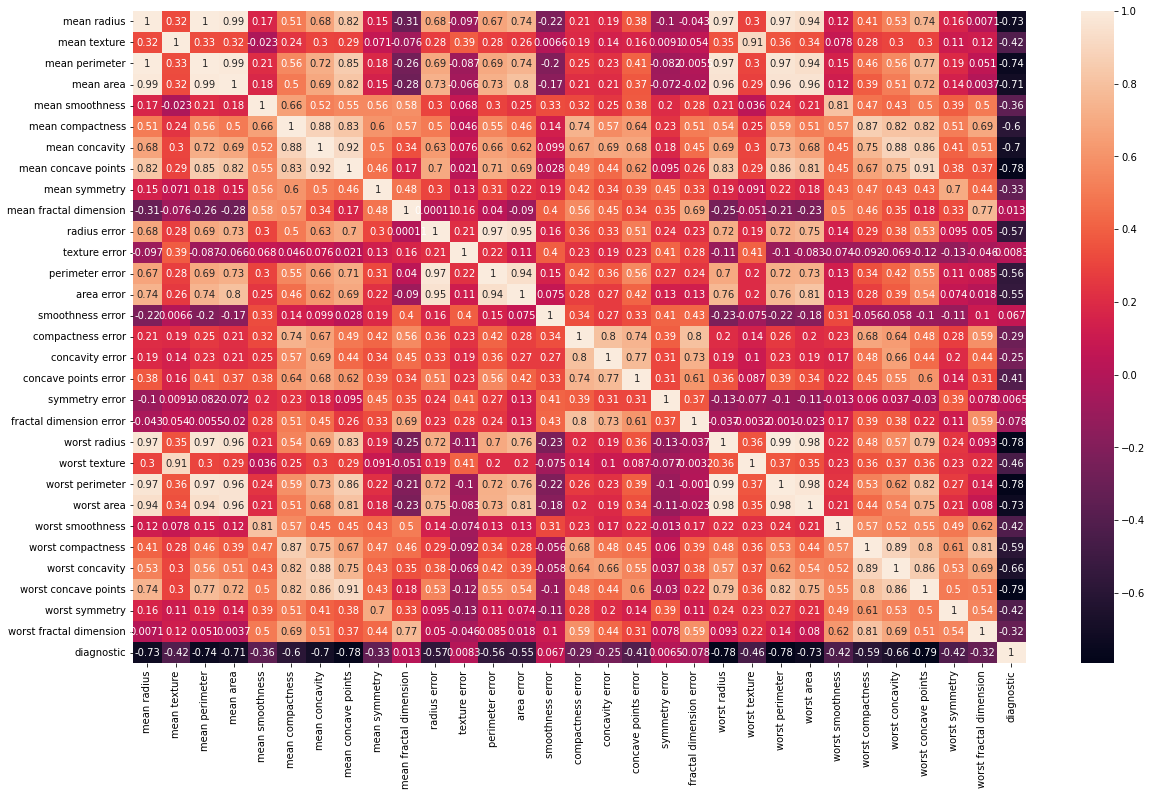

In [8]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(df.corr(), annot=True)

Pelo mapa de calor podemos notar algumas correlações:
 - A relação do Diagnóstico:
 - A relação entre valores médio e os piores.

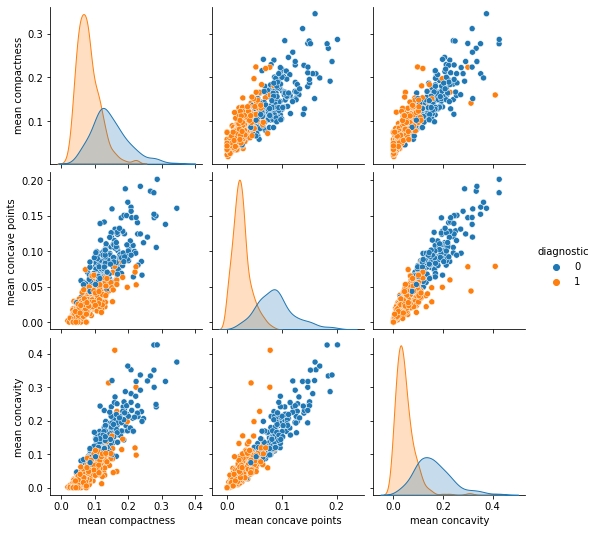

In [13]:
ax = sns.pairplot(data=df[['mean compactness','mean concave points','mean concavity','diagnostic']], hue='diagnostic')

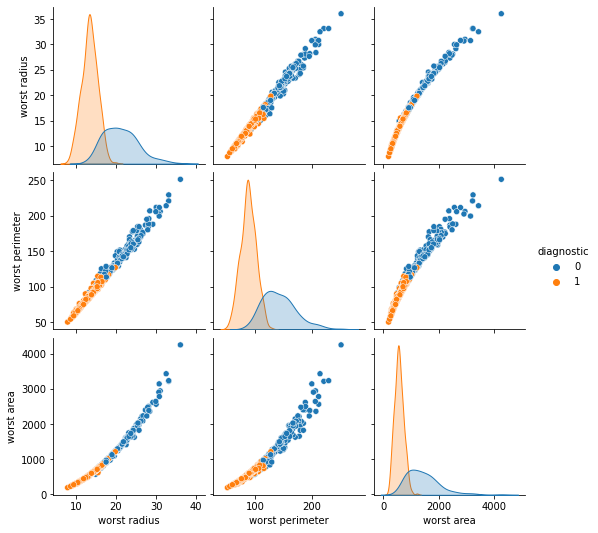

In [12]:
ax = sns.pairplot(data=df[['worst radius','worst perimeter','worst area','diagnostic']], hue='diagnostic')